In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model, svm
from sklearn.tree import DecisionTreeClassifier

dataframe = pd.read_csv('train.csv')



## Análise da base de dados
#### Primeiramente, observamos como a mesma se apresenta

In [2]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
len(dataframe)

891

#### Analisamos os tipos de cada coluna para saber quais tratamentos devemos dar

In [4]:
dataframe.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Verificamos se existe algum valor diferente do esperado

In [5]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Podemos perceber que em Age, algo difere nos dados, dado que temos 891 em contagens para as colunas. Com essa informação, também podemos questionar se existem mais colunas com valores não preenchidos, que podem ser verificados no gráfico

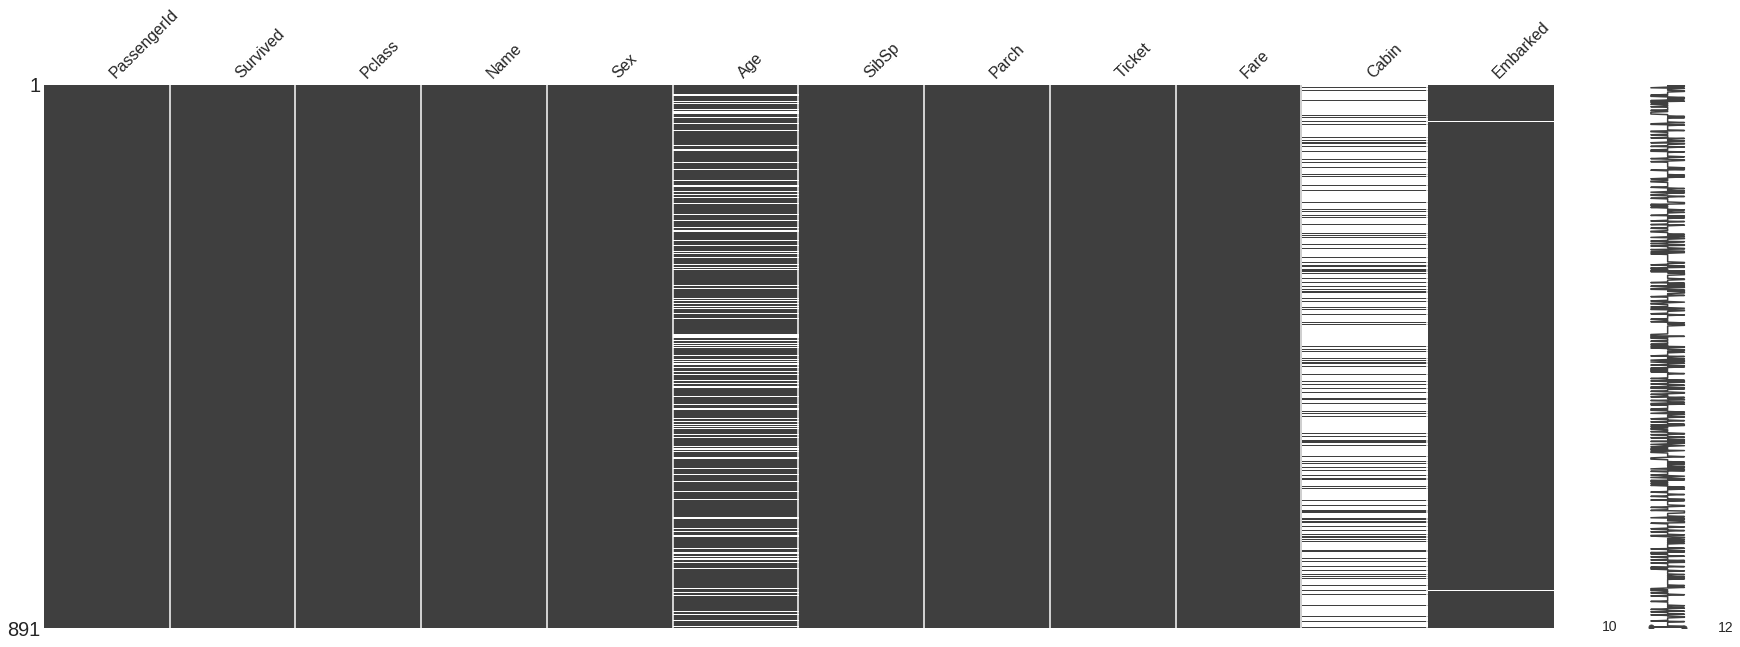

In [6]:
missingno.matrix(dataframe, figsize = (30,10))

In [7]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Percebemos, então, que para os quesitos "Age" e "Embarked", temos 177 informações e 2 informações perdidas, respectivamente. No caso de "Cabin", 687 de 891 foram perdidas, que nos faz pensar em retirar a coluna inteira da base de dados.

### Matriz de correlação

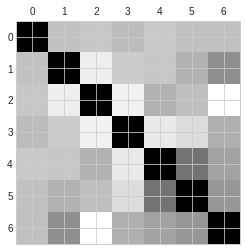

In [8]:
plt.matshow(dataframe.corr())

### Countplot de Survived

0    549
1    342
Name: Survived, dtype: int64


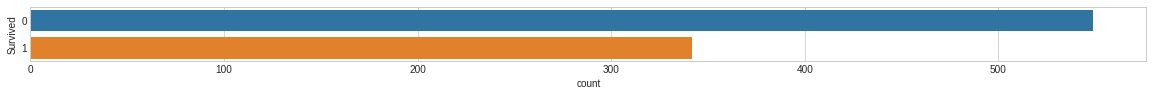

In [9]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=dataframe);
print(dataframe.Survived.value_counts())

## Inicio do tratamento de dados
### Age
#### Sabemos que Age possui valores desconhecidos, então, podemos preenche-los a partir da mediana dos valores que, de fato, existem

In [10]:
dataframe.loc[:,"Age"].median()

28.0

In [11]:
filler = 28.0
dataframe.loc[dataframe.Age.isnull(), 'Age'] = filler

In [12]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Embarked
#### Primeiramente, vamos observar como está sendo representado

In [13]:
dataframe.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Countplot de Embarked

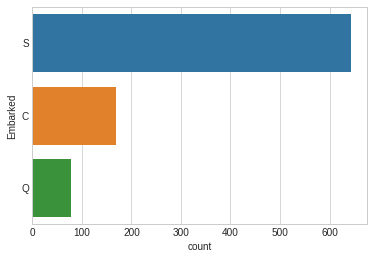

In [14]:
sns.countplot(y='Embarked', data=dataframe);

#### Como possuimos dois valores desconhecidos no atributo Embarked, podemos supor que os mesmos são de Southampton, utilizando a moda.

In [15]:
dataframe['Embarked'].fillna("S",inplace=True)

### Sex
#### Em seguida, convertemos os valores do atributo Sex, de forma que o sexo feminino seja representado por 1 e o masculino por 0.

In [16]:
dataframe['Sex'] = np.where(dataframe['Sex'] == 'female', 1, 0)

In [17]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Retiramos os atributos que não possuem relevância na análise de dados, incluindo Cabin, no qual faltam muitos dados com relação a sua totalidade; e Ticket, onde a transformação para inteiro seria indicado, no entanto, complexo e, utilizar um encoder (à exemplo do OneHotEncoder que será utilizado em seguida) tornaria a base de dados enorme, consequentemente.

In [18]:
del dataframe['Name']

In [19]:
del dataframe['PassengerId']

In [20]:
del dataframe['Cabin']

In [21]:
del dataframe['Ticket']

#### Utilizando o OneHotEncoder para transformar os valores das colunas em 0's e 1's (consequentemente as subdividindo)

In [22]:
one_hot_cols = dataframe.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(dataframe, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0.42,Age_0.67,Age_0.75,Age_0.83,...,Fare_211.5,Fare_221.7792,Fare_227.525,Fare_247.5208,Fare_262.375,Fare_263.0,Fare_512.3292,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Terminado o pré-processamento, podemos seguir com o treinamento

## Inicio do treinamento

In [23]:
train = df_bin_enc
X = train.drop(columns=['Survived'])
y = train.Survived
X.shape

(891, 358)

#### Dividimos a base em 80% para treinamento e 20% para teste

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
X_train.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0.42,Age_0.67,Age_0.75,Age_0.83,Age_0.92,...,Fare_211.5,Fare_221.7792,Fare_227.525,Fare_247.5208,Fare_262.375,Fare_263.0,Fare_512.3292,Embarked_C,Embarked_Q,Embarked_S
614,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
395,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
279,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
347,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
521,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Função de chamadas de teste de treinamento

In [26]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import time
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def rf_train_test(model, train_X, train_y, test_X, test_y, features, param_grid=None): 
    start_time = time.time()
    
    # search param combination that results in higher accuracy using K fold cross-validation
    clf = GridSearchCV(model, param_grid, cv=10, scoring="accuracy", return_train_score=False)
    
    # fit the model with best params
    clf.fit(train_X, train_y)
    print("Best parameters combination: %s\n" % clf.best_params_)

    # predict using fitted model on test/validation data
    y_true, y_pred = test_y, clf.best_estimator_.predict(test_X)
    
    # predict class probabilities
    predictions = clf.predict_proba(test_X)
    
    # keep only the positive class to AUROC metric
    predictions = [p[1] for p in predictions]
    print("\nAUROC accuracy: ", roc_auc_score(y_true, predictions))

    # report over test dataset
    print(classification_report(y_true, y_pred))
    test_score = (clf.score(test_X, test_y)*100)
    print("Test score: %s" % "{0:.3f}%\n".format(test_score))
    
    cm=confusion_matrix(test_y, y_pred)
    print('Matriz de Confusão:')
    print(cm)
    
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    sensibility = tn / (tn+fn)
    print('\nSensibilidade: ', round(sensibility,2))
    
    specificity = tn / (tn+fp)
    print('\nEspecificidade: ', round(specificity, 2))
    
    # calculate training and testing time
    processing_time = time.time() - start_time
    print("\nProcessing time: %s seconds \n" % "{0:.3f}".format(processing_time))

### Método Decision Tree Classifier

In [27]:
train_X = X_train # input training data
train_y = y_train # output trainig data
test_X = X_test # input test data
test_y = y_test # output test data


print("\n ------------ DecisionTreeClassifier \n")
rf_train_test(DecisionTreeClassifier(), 
              train_X, train_y, 
              test_X, test_y,  
              train,
              {
               'max_features': ['sqrt', 'log2'],
               'criterion': ['gini', 'entropy'],
               'random_state': [np.random.seed(1234)],
               'max_depth': [5, 10, 15, None],
              }
              )


 ------------ DecisionTreeClassifier 

Best parameters combination: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'random_state': None}


AUROC accuracy:  0.7635628586332811
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.72      0.72      0.72        71

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Test score: 77.654%

Matriz de Confusão:
[[88 20]
 [20 51]]

Sensibilidade:  0.72

Especificidade:  0.72

Processing time: 1.033 seconds 



/home/tacin/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Método Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

train_X = X_train # input training data
train_y = y_train # output trainig data
test_X = X_test # input test data
test_y = y_test # output test data

print("\n ------------ Random Forest \n")
rf_train_test(RandomForestClassifier(), 
              train_X, train_y, 
              test_X, test_y,  
              train,
              {'n_estimators': [50, 70, 100],
               'max_features': ['sqrt', 'log2'],
               'criterion': ['gini', 'entropy'],
               'random_state': [np.random.seed(1234)],
               'max_depth': [5, 10, 15, None],
               'n_jobs': [-1]}
              )


 ------------ Random Forest 



/home/tacin/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters combination: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1, 'random_state': None}


AUROC accuracy:  0.8631977047470005
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       108
           1       0.86      0.59      0.70        71

    accuracy                           0.80       179
   macro avg       0.82      0.76      0.77       179
weighted avg       0.81      0.80      0.79       179

Test score: 79.888%

Matriz de Confusão:
[[101   7]
 [ 29  42]]

Sensibilidade:  0.59

Especificidade:  0.86

Processing time: 145.232 seconds 



#### Portanto, o algoritmo que resultou a melhor acurácia foi o Random Forest Classifier. O mesmo atingiu 86% de acurácia e pode ser explicado como um algoritmo melhor que o Decision Tree Classifier devido à presença de inúmeras árvores em sua implementação, onde o Decision Tree apenas consiste em uma. Então, o Random Forest traz uma sensibilidade menor e especificidade maior, contudo, o tempo de processamento foi comprometido para um valor maior.